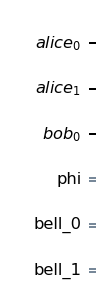

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
alice = QuantumRegister(2, name="alice")
bob = QuantumRegister(1, name="bob")
phi = ClassicalRegister(1, name='phi')
bell_0 = ClassicalRegister(1, name='bell_0')
bell_1 = ClassicalRegister(1, name='bell_1')
qc = QuantumCircuit(alice, bob, phi, bell_0, bell_1)
qc.draw(output='mpl')

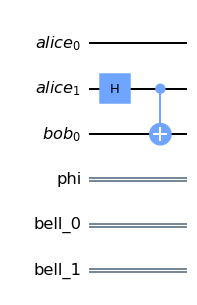

In [14]:
# Intitialize the entangled pair
qc.h(alice[1])
qc.cx(alice[1], bob[0])
qc.draw(output='mpl')

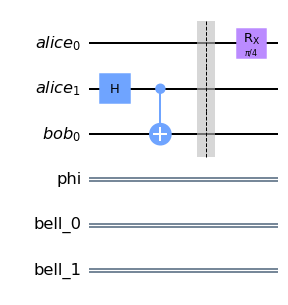

In [15]:
qc.barrier()

# Do whatever you want to Alice's first qubit
from math import pi
qc.rx(pi/4, alice[0])
qc.draw(output='mpl')

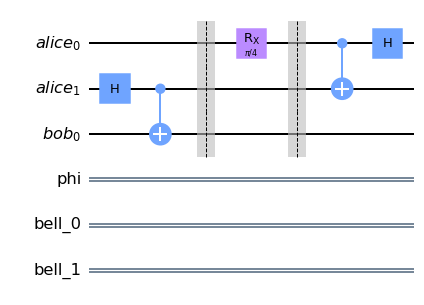

In [16]:
qc.barrier()

# The teleportation protocol
qc.cx(0,1)
qc.h(0)
qc.draw(output='mpl')

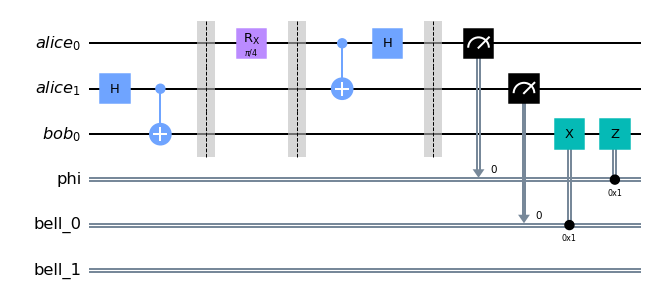

In [17]:
qc.barrier()

# Measuring and sending classical information
qc.measure(alice[0], phi)
qc.measure(alice[1], bell_0)

qc.x(bob[0]).c_if(bell_0, 1)
qc.z(bob[0]).c_if(phi, 1)

qc.draw(output='mpl')

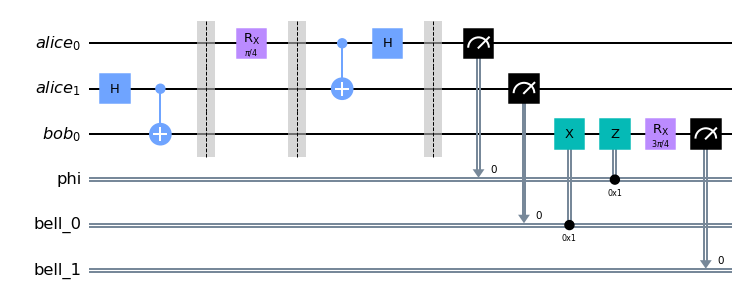

In [18]:
# The teleportation is complete! Now we measure qubit bob[0] to verify that it is in the correct state.
qc.rx(3*pi/4, bob[0])
qc.measure(bob, bell_1)
qc.draw(output='mpl')

In [19]:
# Execute the circuit on the QASM simulator
from qiskit import BasicAer, execute
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend).result()
results.get_counts()

{'1 1 1': 254, '1 0 0': 270, '1 1 0': 252, '1 0 1': 248}

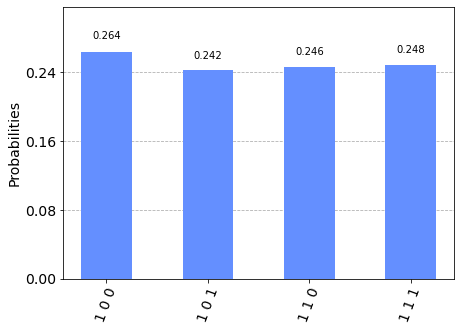

In [20]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(results.get_counts(qc))

In [ ]:
# We see that the output classical bit 1 is always a "1"